https://www.kaggle.com/kumaml/kuma-house-price-predict

In [1]:
datapath = './input/'
df_train = pd.read_csv(datapath + 'train.csv')
df_test = pd.read_csv(datapath + 'test.csv')

In [4]:
df_train.shape

(1460, 81)

In [5]:
df_test.shape

(1459, 80)

In [6]:
# 这两部分是训练和提交的时候要用到的
ids = df_test['Id']
train_Y = df_train['SalePrice']

In [7]:
df_train = df_train.drop(['Id', 'SalePrice'], axis=1)
df_test = df_test.drop(['Id'], axis=1)

/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/scipy/stats/stats.py:1626: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


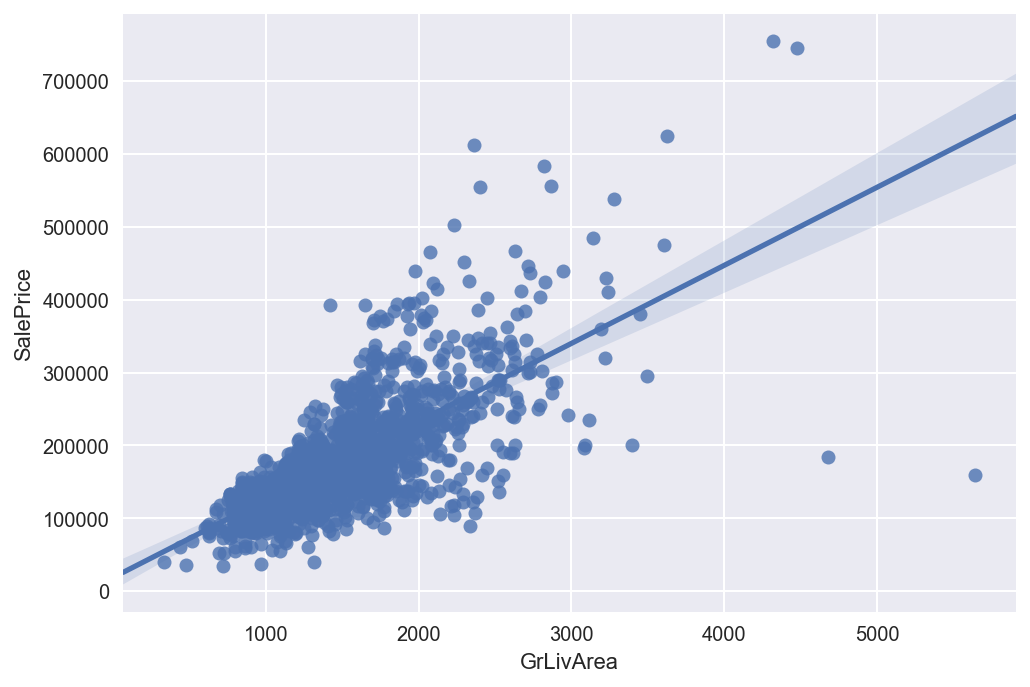

In [9]:
import seaborn as sns

sns.regplot(x=df_train['GrLivArea'], y=train_Y)
plt.show()

/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/scipy/stats/stats.py:1626: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


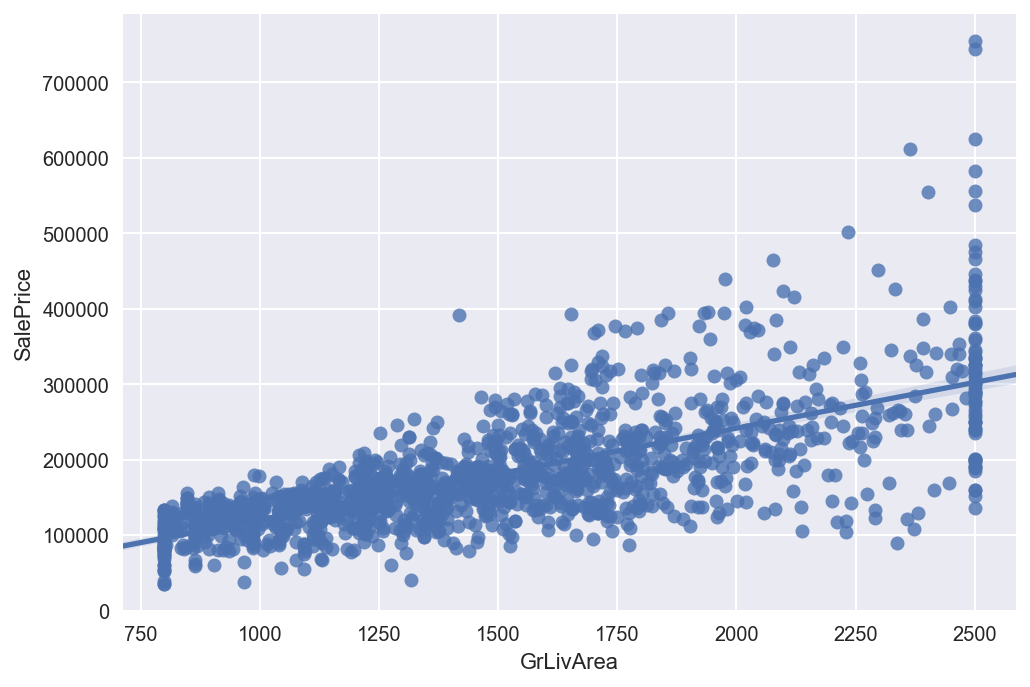

In [10]:
df_train['GrLivArea'] = df_train['GrLivArea'].clip(800, 2500)
sns.regplot(x=df_train['GrLivArea'], y=train_Y)
plt.show()

In [11]:
IsMatched = (df_train['GrLivArea'] > 800) & (df_train['GrLivArea'] < 2500)
IsMatched.head()

0    True
1    True
2    True
3    True
4    True
Name: GrLivArea, dtype: bool

In [14]:
# 去除离群点
df_train = df_train[IsMatched]
train_Y = train_Y[IsMatched]

/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/scipy/stats/stats.py:1626: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


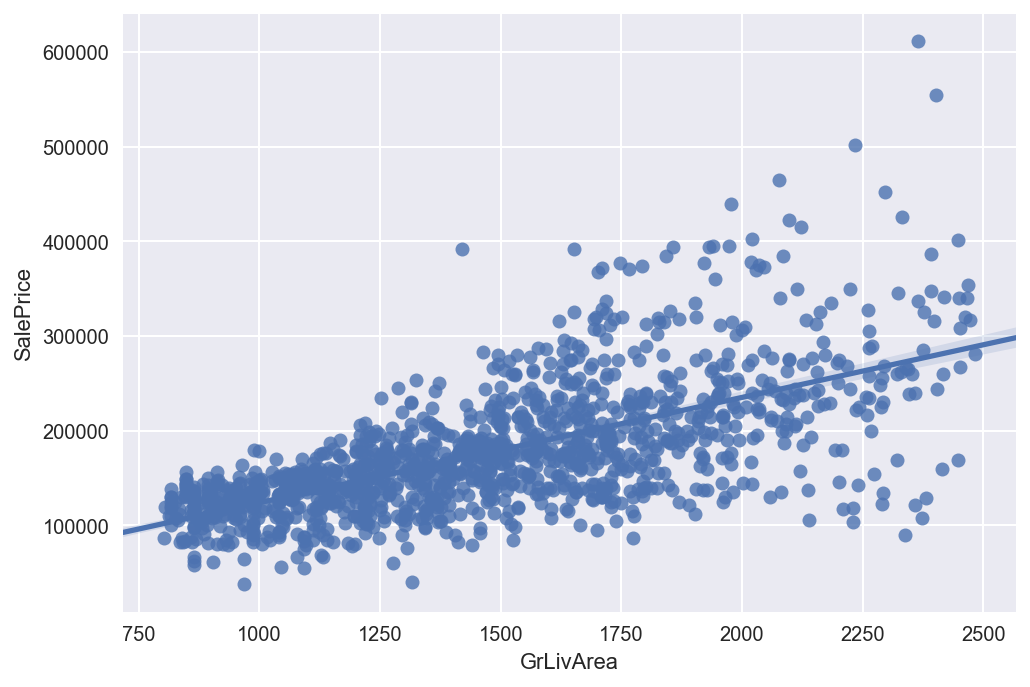

In [15]:
sns.regplot(x=df_train['GrLivArea'], y=train_Y)
plt.show()

/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/scipy/stats/stats.py:1626: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


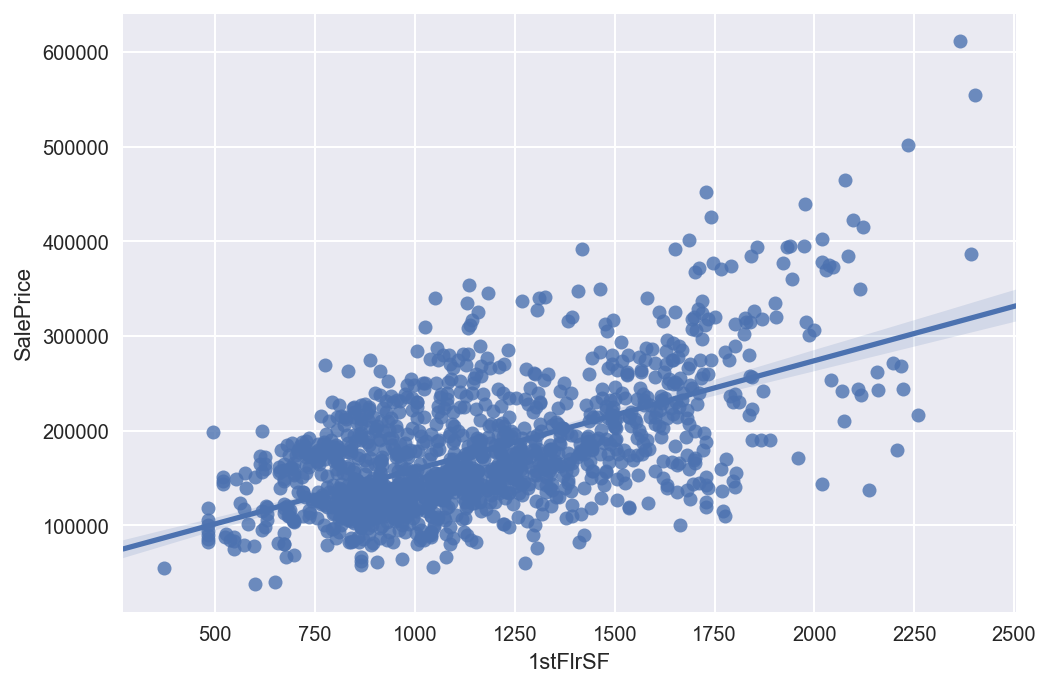

In [16]:
sns.regplot(x=df_train['1stFlrSF'], y=train_Y)
plt.show()

In [18]:
IsMatched = (df_train['1stFlrSF'] > 500) & (df_train['1stFlrSF'] < 2250)
df_train = df_train[IsMatched]
train_Y = train_Y[IsMatched]

/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/scipy/stats/stats.py:1626: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


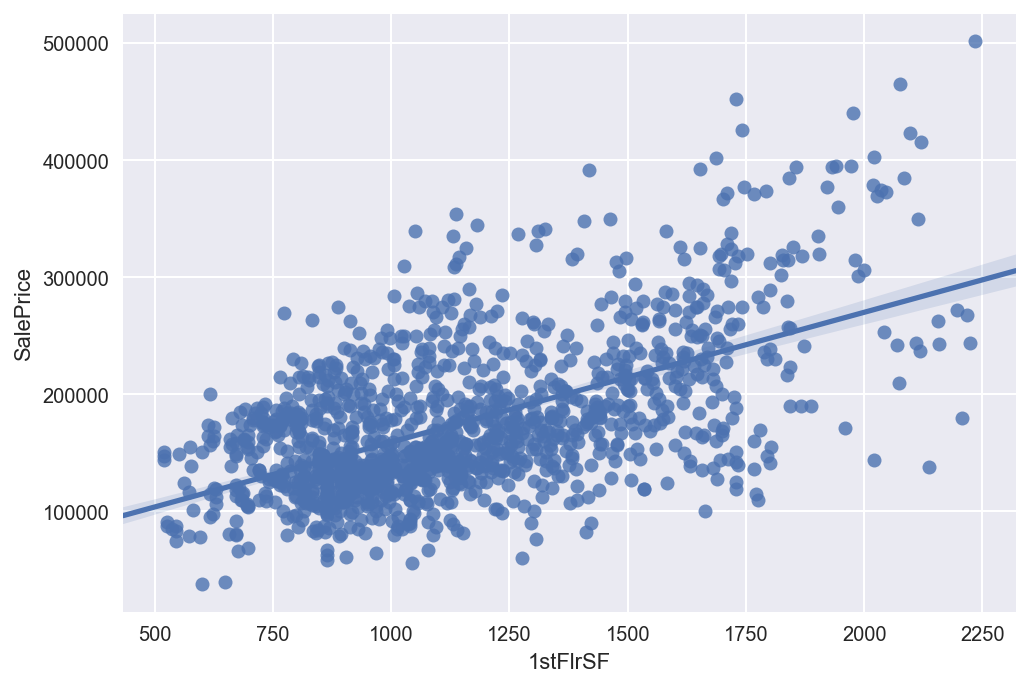

In [19]:
sns.regplot(x=df_train['1stFlrSF'], y=train_Y)
plt.show()

In [21]:
df = pd.concat([df_train, df_test])
df.shape

(2790, 79)

下面这个处理比较粗糙。

In [23]:
from sklearn.preprocessing import LabelEncoder
lblencoder = LabelEncoder()

for c in df.columns:
    df[c] = df[c].fillna(-1)
    if df[c].dtype == 'object':
        df[c] = lblencoder.fit_transform(list(df[c].values))
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,4,65.0,8450,1,0,3,3,1,4,...,0,0,0,0,0,0,2,2008,9,4
1,20,4,80.0,9600,1,0,3,3,1,2,...,0,0,0,0,0,0,5,2007,9,4
2,60,4,68.0,11250,1,0,0,3,1,4,...,0,0,0,0,0,0,9,2008,9,4
3,70,4,60.0,9550,1,0,0,3,1,0,...,0,0,0,0,0,0,2,2006,9,0
4,60,4,84.0,14260,1,0,0,3,1,2,...,0,0,0,0,0,0,12,2008,9,4


In [28]:
from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler()
data = mmscaler.fit_transform(df)


In [29]:
trainnum = train_Y.shape[0]
train_X = data[:trainnum]
test_X = data[trainnum:]

In [30]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(train_X, train_Y)
pred = model.predict(test_X)

In [33]:
from sklearn.metrics import mean_squared_error

mean_squared_error(train_Y,pred)

ValueError: Found input variables with inconsistent numbers of samples: [1331, 1459]

In [ ]:
submission = pd.DataFrame({'Id':ids, 'SalePrice':pred})
submission.head()
submission.to_csv('submission.csv', index=False)